In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(ds_test, ds_train), ds_info = tfds.load(
    'oxford_flowers102',
    split=['train', 'test'],
    shuffle_files=False,
    as_supervised=True,
    with_info=True,
)

Metal device set to: Apple M1 Pro


2022-04-01 15:17:30.250353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-01 15:17:30.250647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-04-01 15:17:32.449042: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


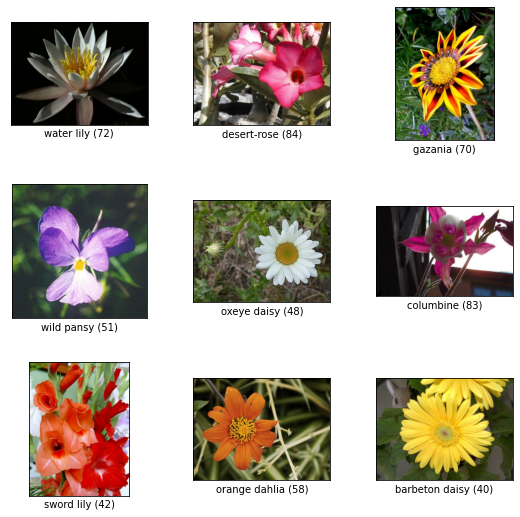

In [3]:
fig = tfds.show_examples(ds_test, ds_info)

In [4]:
image_shape = (64, 64)
batch_size = 128

In [5]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label


def resize_img(image, label):
    return tf.image.resize(image, image_shape), label

In [6]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.map(resize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['test'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [7]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(resize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(*image_shape, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(*image_shape, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(*image_shape, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(*image_shape, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(*image_shape, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(*image_shape, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(102, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    ds_train,
    epochs=15,
    validation_data=ds_test,
)

Epoch 1/15


/Users/pbreton/Documents/Development/Misc/cours-iut/machine_learning/venv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-04-01 15:28:08.229186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 4.3275 - accuracy: 0.0579

2022-04-01 15:28:15.058348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 8s 58ms/step - loss: 4.3275 - accuracy: 0.0579 - val_loss: 4.5837 - val_accuracy: 0.0284
Epoch 2/15
49/49 [==============================] - 2s 42ms/step - loss: 3.7850 - accuracy: 0.1099 - val_loss: 4.0546 - val_accuracy: 0.0686
Epoch 3/15
49/49 [==============================] - 2s 41ms/step - loss: 3.3552 - accuracy: 0.1638 - val_loss: 3.7538 - val_accuracy: 0.1000
Epoch 4/15
49/49 [==============================] - 2s 41ms/step - loss: 3.0226 - accuracy: 0.2238 - val_loss: 3.4267 - val_accuracy: 0.1392
Epoch 5/15
49/49 [==============================] - 2s 41ms/step - loss: 2.7562 - accuracy: 0.2802 - val_loss: 3.4518 - val_accuracy: 0.1775
Epoch 6/15
49/49 [==============================] - 2s 41ms/step - loss: 2.4476 - accuracy: 0.3565 - val_loss: 3.3811 - val_accuracy: 0.1922
Epoch 7/15
49/49 [==============================] - 2s 41ms/step - loss: 2.1749 - accuracy: 0.4155 - val_loss: 2.9733 - val_accuracy: 0.2735
Epoch 8/15
49/49 [======

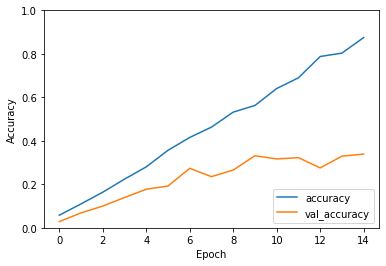

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')